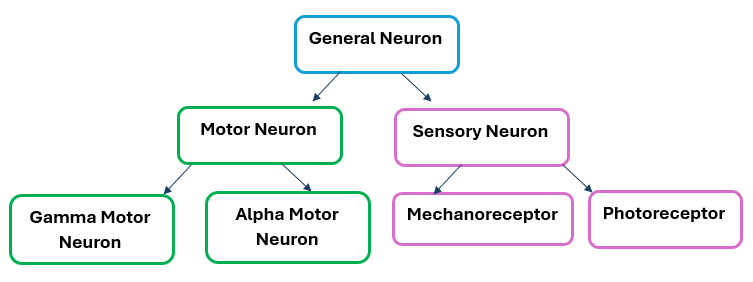

In [4]:
class General_Neuron:
    def __init__(self,firing_rate):
        self.firing_rate = firing_rate #firing rate - numerical value that represent how frequently the neuron fires in response to a stimulus.
    def activate(stimulus):
        #this function recieve a stimulus and calculate the firing rate according to the strength of that stimulus.
        #this is the Super class! all other subclasses inherit attributes and functions from it.
        pass

class Sensory_Neuron(General_Neuron):
    #A neuron that detects and respons to external stimuli. inherit from the General_Neuron
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate) #the inherited attribute
        self.receptor_type = receptor_type #the type of stimulus the neuron detects.
    def sense_stimuulus(specific_stimulus):
        #this function get as an input the specific stimulus the neuron is sensitive to, and activate the neuron by the strength or type of that stimulus.
        pass

class Motor_Neuron(General_Neuron):
    """A neuron responsible for initiating muscle movement by sending activation signals to a target muscle. inherit from the general nuron the basic attributes and functions for a neuron."""
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate) #inherit from the general neuron
        self.target_muscle = target_muscle # the muscle controlled by the neuron.
    def control_muscle(activation_level):
        #this function triggers a response in the target muscle based on the neuron's activation level. 
        pass

class Photoreceptor(Sensory_Neuron):
    '''A sensory neuron --> inherit from the sensory neuron class. sensitive to light'''
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate, receptor_type = "light") #the inherited attribute
    def light_detection(light_intencity):
        #this function receives light intencity and activates according to light levels.
        pass
    def activate(self): 
        super().activate() #extends the functionality of the parent function, but use this child function
        #This function exhibit a behaviour to light detection. for example - incrising firing rate for higer light intensity
        pass

class Mechanoreceptor(Sensory_Neuron):
    '''Asensory neuron --> inhirit from sensory neuron class. responds to pressure.'''
    def __init__(self,firing_rate,receptor_type):
        super().__init__(firing_rate, receptor_type = "pressure")
    def pressure_detection(pressure):
        #this function get a pressure as an input and activates according to the the strength of the applied pressure.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        #this function produces a unique respond to pressure, and changing the firing rate according to it's level.
        pass

class Alpha_Motor_Neuron(Motor_Neuron):
    '''A motor neuron --> inherit from the motor neuron class. controls skeletal muscles.'''
    def __init__(self, firing_rate,target_muscle):
        super().__init__(firing_rate, target_muscle = "skeletal muscle")
    def skeletal_muscle_control(activation_level):
        # this function initiates muscle contractions or movement in response to its activation level.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        # this function exhibit the control mechanisms appropriate for skeletal muscles, for example: strong contractions.
        pass
class Gamma_Motor_Neuron(Motor_Neuron):
    '''A motor neuron --> inherit from the motor neuron class. control muscle spindles, helping regulate muscle tone.'''
    def __init__(self,firing_rate,target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = "muscle spindle" 
    def muscle_spindle_control(self):
        # this function adjusts muscle spindle tension in response to activation, affecting muscle tone.
        pass
    def activate(self):
        super().activate() #extends the functionality of the parent function, but use this child function
        # this function present a response spesific to muscle spindles.



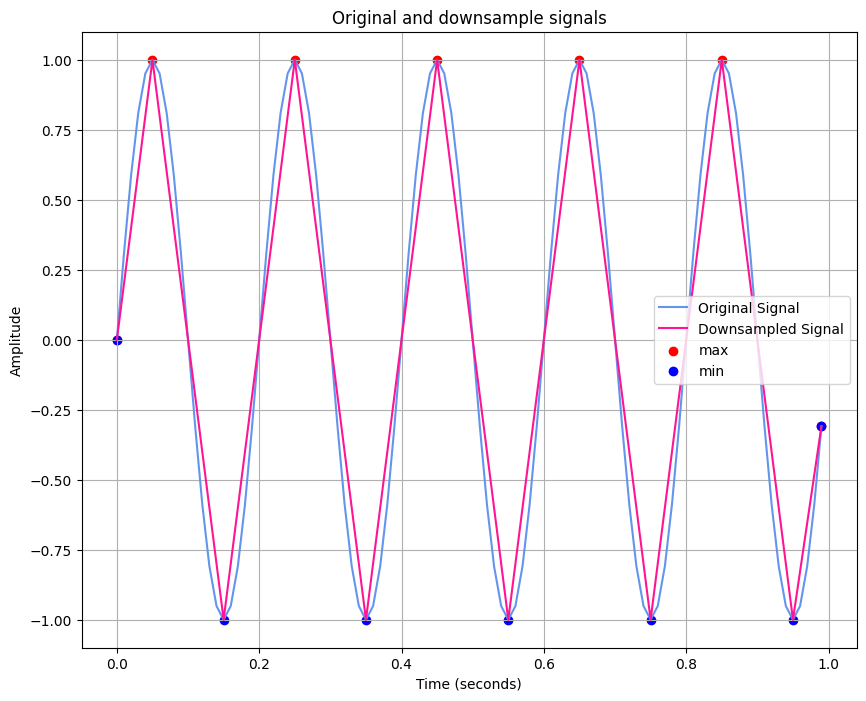

The length of the original signal : 100
The length of the downsample signal:  21


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def down_sinusoidal(signal):
    '''This function gets the signal as input, and downsample it, while keeping the min and max points.
    the output - the length of the new array will be approximately 20% of the original '''

    # first, i create an empty list for the max and min indices point. 
    # i will put here the local max and min  indices points to use them later in order to preserve the max and min in the downsample.
    max_idx = []
    min_idx = []

    # now, using a for loop => i will go through the signal and identify the local max and min points, and then add their indcies
    for i in range(1, len(signal) -1 ): # i start in 1 becase i will includ the zero point later as min point
        if signal[i-1] < signal[i] > signal[i+1]: # if the point in index i is higer then both points in 2 direction, it means this is the local max. 
            max_idx.append(i) #append the index to the max list
        elif signal[i-1] > signal[i] < signal[i+1]: # if the point is lower then the 2 points from right and left - it is a local min point.
            min_idx.append(i) #append the index to the min index list to preserve it

    # as known, also the first and last points considered extreme points:
    max_idx = [0] + max_idx + [len(signal) - 1] # i concatenated the max indexes that i found, to zero at the begining and the last point index
    min_idx = [0] + min_idx + [len(signal) - 1] # same for the min indexes.

    # creating the downsampled signal by getting every 5 point
    # note that it still doesnt contain the max and min points
    down_idx = np.arange(0, len(signal),5) # making an array in the length of the original signal, but taking every 5 point

    # adding the max and min to the down sample:
    down_idx = np.unique(np.concatenate([down_idx,max_idx,min_idx]))

    # now, after i updated the down indexes to contain the min and max and also the arange of every 5 point, i can create the signal based on the downsaple indexes
    down_signal = signal[down_idx]

    # the function return the variables:
    return down_signal , down_idx , max_idx , min_idx , signal

# creating the original signal:
friquency = 5 # friquency of 5 Hz
sin_arr = np.arange(0,1,0.01) # create an array from 0 to 1 with jumps of 0.01 - this is the X axis
signal = np.sin(2*np.pi*friquency*sin_arr) # this is the signal, y axis 

# using the down_sinusoidal function to downsample the signal:
down_signal, down_idx , max_idx , min_idx , original_signal = down_sinusoidal(signal) # the inpot is the signal, the output will be the downsample signal and its variables

# plotting the 2 graphs:
plt.figure(figsize=(10,8)) 
plt.plot(sin_arr, original_signal, label='Original Signal', color='cornflowerblue') # ploting the original signal by its x variables and y
plt.plot(sin_arr[down_idx], down_signal, label='Downsampled Signal', color='deeppink') # plotting the signal using the downsample index and y values

# marks the max and min points:
plt.scatter(sin_arr[max_idx], original_signal[max_idx], color = 'red', label = 'max')
plt.scatter(sin_arr[min_idx], original_signal[min_idx], color = 'blue', label = 'min')

#title:
plt.title("Original and downsample signals")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# printing the length of the original and downsamples array to see it is approximatly 20% :
print("The length of the original signal :" , len(signal))
print("The length of the downsample signal: ", len(down_signal))



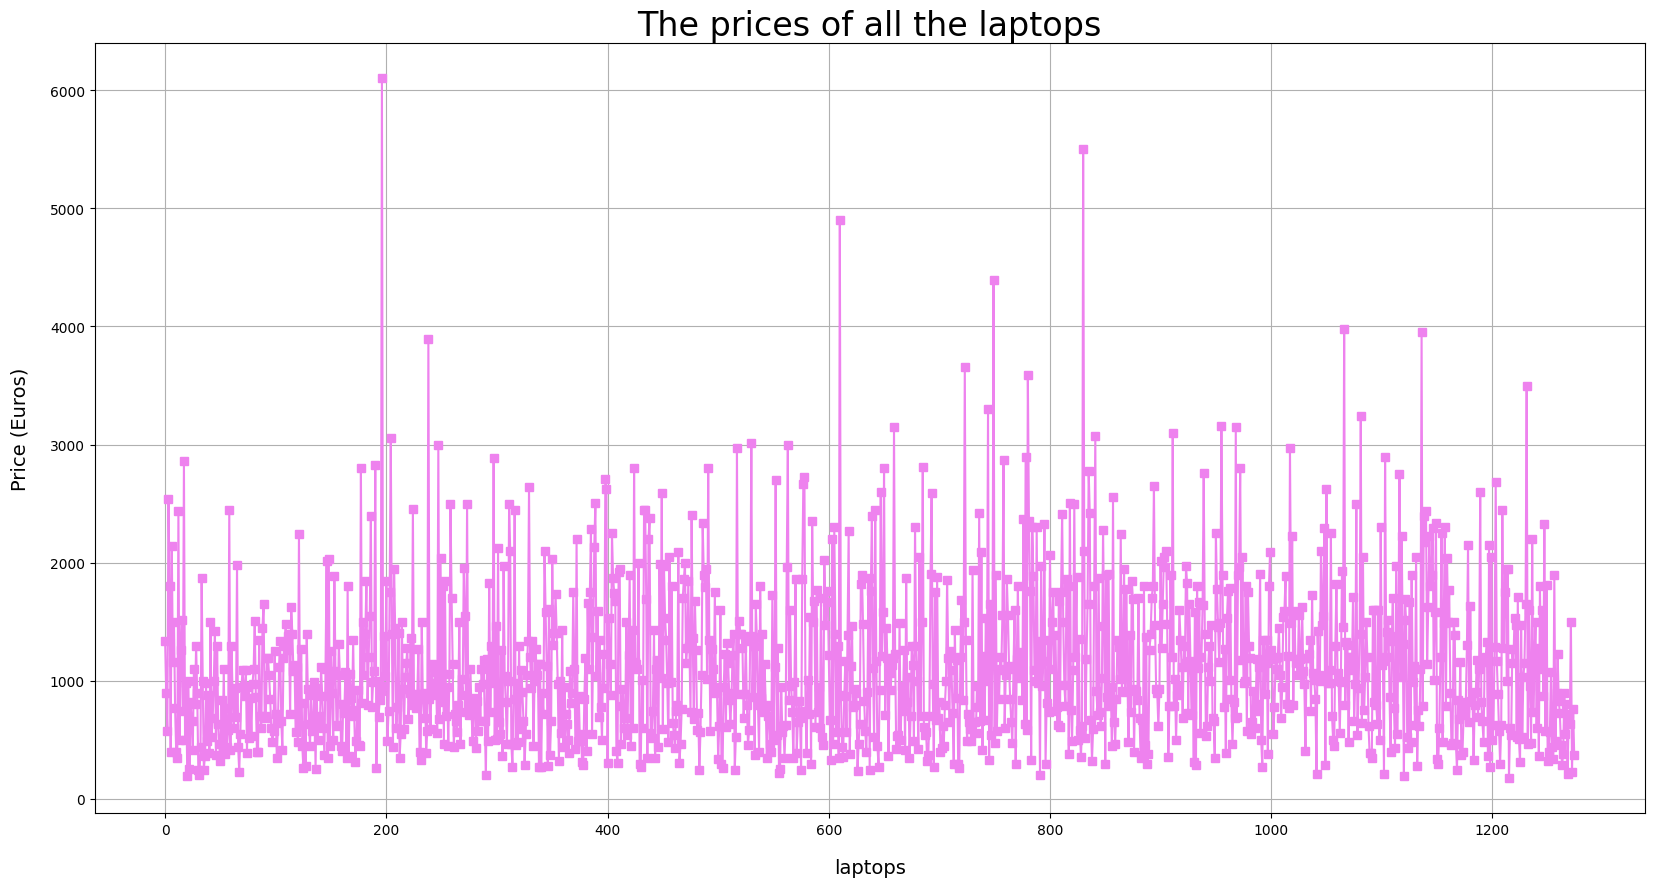

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

# i created a figure with a defiend size, so the graph will be easyer to read. 
plt.figure(figsize= (20, 10))

'''Now I plot the price of all leptops.
first, i accesesed the colomn of the price from the data vaiable that represent the csv file. the access: data['Price (Euro)].
I searched on the - matplot lib website the color i wanted - violet, and used the marker for squer - s , as we learned last year.'''
plt.plot(data['Price (Euro)'] , color = 'violet', marker = 's')

'''Adding labels to the axies and a title for the graph:
the labelpad => helps to make a space between the lable and its axis
I made sure that the title is in the center by writing: loc = center '''
plt.xlabel('laptops', fontsize = 14, labelpad= 15)
plt.ylabel('Price (Euros)', fontsize = 14 , labelpad = 15)
plt.title('The prices of all the laptops', fontsize = 24 , loc = 'center')

'''Adding a grid:'''
plt.grid(True)
plt.show()

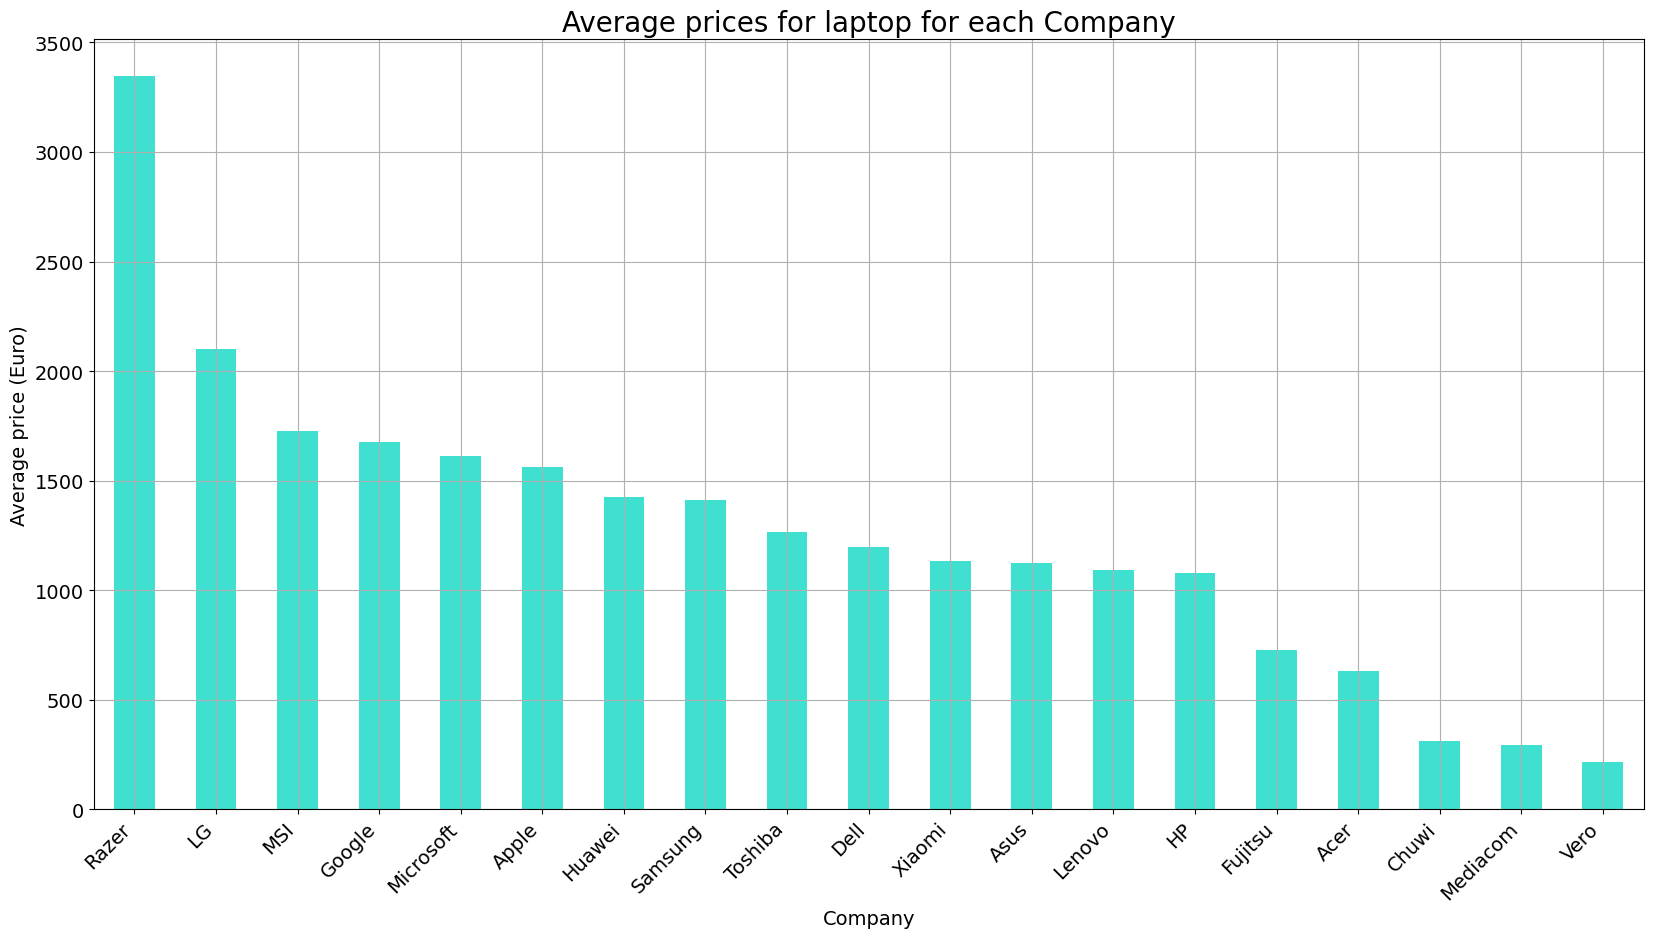

The company that has on average the most expensive laptop: Razer
The highest average price: 3346.1428571428573 Euros
The average leptop price for each company: 
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price (Euro), dtype: float64


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

#create a figure with a comfortable size, so it will be easyer to read the graph. everything will be presented on it. 
plt.figure(figsize= (20, 10))

'''Calculate the average price for each company:
groupby() => allows to group and analyes the data in the selected group.
I chose to show the average price for each company, so i accessed the Company column and gruoped the average price for each company.
note that without the gropby function, each company had a lot of seperated values.
.mean() => calculate the average price for each company
.sort_values() => sorting by the average price in decending order by writing: ascending = False'''
average_price = data.groupby('Company')['Price (Euro)'].mean().sort_values(ascending =False)

'''plot the bar graph after the calculation of the average price:
kind = bar => to create a bar graph'''
average_price.plot(kind = 'bar',color = 'turquoise', fontsize= 14 )

'''Adding titels and labels'''
plt.title('Average prices for laptop for each Company', fontsize = 20)
plt.xlabel('Company', fontsize = 14)
plt.ylabel('Average price (Euro)', fontsize = 14)
plt.xticks(rotation = 45, ha='right') #rotation - the labels under the bars will be in 45 degrees to the right (easy to read)
plt.grid(True)
# show the plot
plt.show()

'''Finding the answers for this question:
the idxmax() function => return the inex of the maximum value. It will return the name of the company that has the higher average price of laptop'''
print(f"The company that has on average the most expensive laptop: {average_price.idxmax()}")
print(f"The highest average price: {average_price.max()} Euros")
print(f"The average leptop price for each company: \n{average_price}")


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

'''In order to see all kind of options for operating systems names, i used the unique() function and printed it. i put it here as a note for the proccess.'''
#print(data['OpSys'].unique())

def uniform_f(before_change):
    '''This function get the names of operating system from the OpSys column and shift it to the uniform style.'''
    before_change = before_change.lower().strip() # lower => to check uniformli, and strip to make sure there are no spaces in the start and end.
    if "mac" in before_change :
        return "Mac OS" #change to the uniform style
    elif "no os" in before_change:
        return "No OS"
    elif "windows" in before_change:
        return "Windows"
    elif "linux" in before_change:
        return "Linux"
    elif "android" in before_change:
        return "Android"
    elif "chrome os" in before_change:
        return "Crome OS"

data['OpSys'] = data["OpSys"].apply(uniform_f) # calling the function to make it uniform, and than apply it.
print(f"The operating systems:  {data["OpSys"].unique()}") # i used the unique function that return each kind of operating system only once. 


The operating systems:  ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Crome OS']


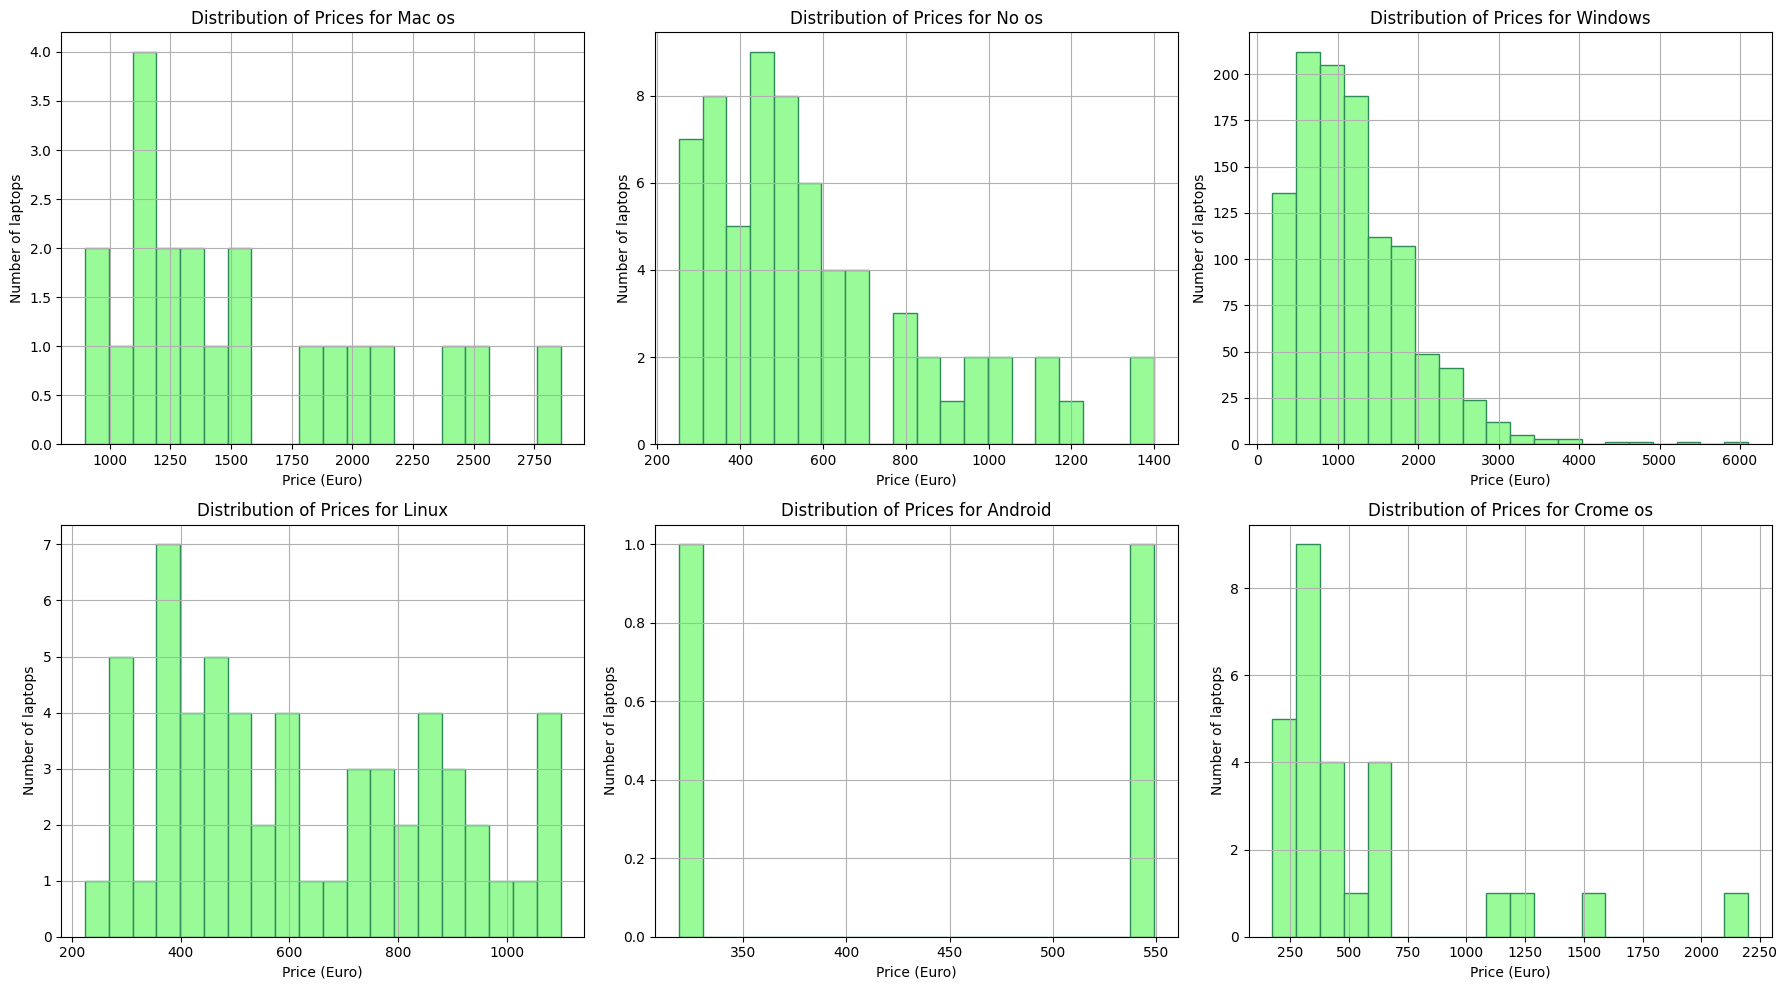

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

# the function i build in the last box of code:
def uniform_f(before_change):
    '''This function get the names of operating system from the OpSys column and shift it to the uniform style.'''
    before_change = before_change.lower().strip() # lower => to check uniformli, and strip to make sure there are no spaces in the start and end.
    if "mac" in before_change :
        return "Mac OS" #change to the uniform style
    elif "no os" in before_change:
        return "No OS"
    elif "windows" in before_change:
        return "Windows"
    elif "linux" in before_change:
        return "Linux"
    elif "android" in before_change:
        return "Android"
    elif "chrome os" in before_change:
        return "Crome OS"

data['OpSys'] = data["OpSys"].apply(uniform_f) #calling the function so everything will look uniform
operating_sys = data["OpSys"].unique() #only the types of operating system (unique)

'''creating a subplot in order to preasent the graphs together'''
fig, axes = plt.subplots(2, 3,figsize = (18,10)) # 2 rows and 3 columns
axes = axes.flatten() # the flatten function convert an array of multiple dimension to a 1D array. here i did this funcion on the axes so that the array will be flatten and it will be easyer to get to each subplot.

'''going through a loop on the unique operating systems and ploting the distribution based on the data.
enumerate() => the enumerate function helps when dealing with iterators, to keep the count of the iterator '''
for i, os_type in enumerate(operating_sys):
    ops_data = data[data['OpSys'] == os_type] #filtering the data to the current operating system 
    axes[i].hist(ops_data['Price (Euro)'], bins = 20, color = 'palegreen', edgecolor = 'seagreen') #ploting the histogram- each os by the prices
    axes[i].set_title(f"Distribution of Prices for {os_type.capitalize()}") #create a title based on the current operating system. 
    axes[i].set_xlabel("Price (Euro)")
    axes[i].set_ylabel("Number of laptops")
    axes[i].grid(True) #adding a grid to each subplot

plt.tight_layout() # adjusting the layout to prevent overlap
plt.show()

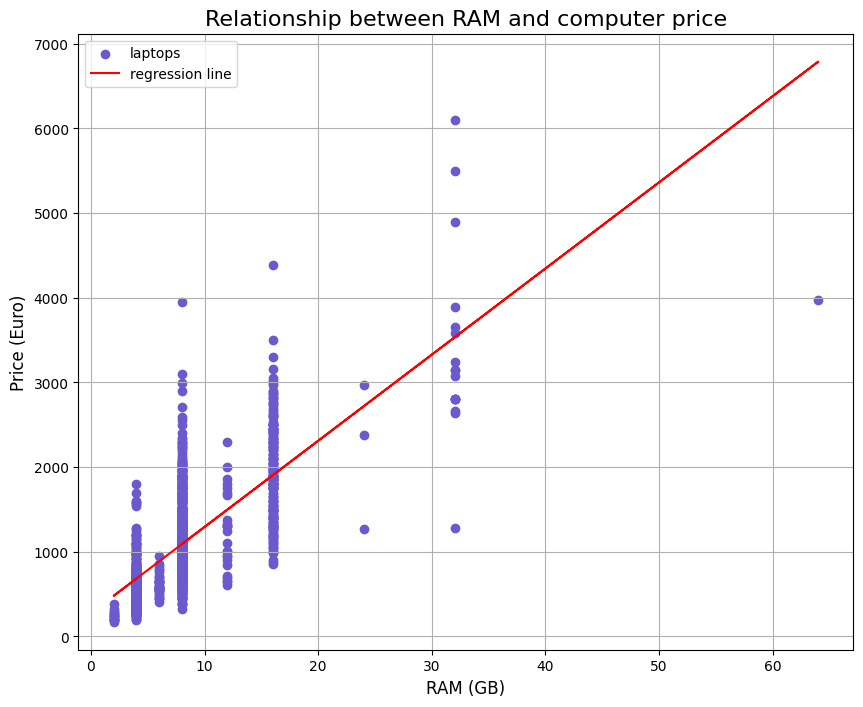

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

'''First, i will plot the relationship between RAM and computer price'''
plt.figure(figsize = (10,8))

'''creating the regression line:
The polyfit() function => work on one veriable regression- use the RAM to predict the Price, for a simple regression the degree is 1
The polyval() function => to plot the regression line. i gave the reg and the independent variable - RAM
it will make an array with the predicted values based on the best fit line calculated from above'''
reg = np.polyfit(data['RAM (GB)'], data['Price (Euro)'], deg = 1)
trend = np.polyval(reg, data['RAM (GB)'])

# creating a scatter plot of the columes -RAM (GB) - and - Price (Euro) - the marker is the shape of each dot in the graph
plt.scatter(data['RAM (GB)'], data['Price (Euro)'], color = 'slateblue' , marker = 'o', label = 'laptops') # the label is for the legend

#plot the trend line (regression):
plt.plot(data['RAM (GB)'], trend, color = 'red', label = 'regression line') # lable for the legend

# design the graph:
plt.title("Relationship between RAM and computer price", fontsize = 16)
plt.xlabel('RAM (GB)', fontsize = 12)
plt.ylabel('Price (Euro)', fontsize = 12)
plt.legend() #display the legend
plt.grid(True)

plt.show()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

'''First, i wanted to see how many types of storage there are, so i used the unique function. I noticed that sometimes, there are some attributes together with +
i keep here the print function so you can see the process:'''
#print(data['Memory'].unique())

def extract_storage_type(st_value):
    '''This function go through the Memory column and extract only the storage types for each value '''
    storage_types = ['SSD', 'HDD', 'Flash Storage', 'Hybrid'] #the unique storage types. i found this values by using the unique function.
    found_types = [] #the storage types after extraction will be appending to here.

    for storage in storage_types: # storage represent each of the unique storage types from the storage_type list (for example - SSD)
        if storage in st_value: #if this unique storage type is in the original value => append the unique type to the list after extraction - found_types
            found_types.append(storage)
    
    if len(found_types) >= 1: #found_types represent the current values that added to the list. cheack if the list isnt empty:
        print(found_types) # i printed the list to see the current types of storage added. just so i can be sure for the process
        return "+".join(found_types) # if there are multiple values in the current adding to the list => join them by +
    else:
        return None # to avoid errors

data['Storage type'] = data['Memory'].apply(extract_storage_type) # aplying the function of extraction on the original column - Memory, and save it to a new column - Storage type.
data.head(50) # show the first 50 rows to see also the values that have multiple types


['SSD']
['Flash Storage']
['SSD']
['SSD']
['SSD']
['HDD']
['Flash Storage']
['Flash Storage']
['SSD']
['SSD']
['HDD']
['HDD']
['SSD']
['SSD']
['SSD']
['SSD']
['SSD']
['SSD']
['HDD']
['SSD']
['Flash Storage']
['SSD', 'HDD']
['HDD']
['SSD']
['SSD']
['HDD']
['Flash Storage']
['SSD']
['SSD']
['HDD']
['Flash Storage']
['Flash Storage']
['HDD']
['SSD']
['Flash Storage']
['Flash Storage']
['HDD']
['SSD', 'HDD']
['HDD']
['SSD']
['HDD']
['SSD', 'HDD']
['HDD']
['SSD']
['HDD']
['SSD']
['SSD']
['SSD', 'HDD']
['SSD']
['HDD']
['Flash Storage']
['SSD']
['SSD']
['SSD']
['HDD']
['SSD']
['SSD']
['SSD']
['SSD', 'HDD']
['SSD']
['SSD', 'HDD']
['SSD']
['SSD']
['SSD']
['SSD']
['SSD']
['HDD']
['SSD']
['HDD']
['HDD']
['SSD']
['SSD']
['SSD']
['SSD', 'HDD']
['HDD']
['HDD']
['HDD']
['SSD', 'HDD']
['HDD']
['SSD', 'HDD']
['SSD']
['SSD']
['SSD']
['SSD']
['HDD']
['SSD', 'HDD']
['SSD']
['SSD']
['SSD', 'HDD']
['SSD']
['HDD']
['HDD']
['SSD']
['SSD']
['SSD']
['SSD']
['HDD']
['SSD']
['SSD']
['SSD', 'HDD']
['SSD']
['HDD']


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Storage type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.30,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.50,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.70,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.10,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.00,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00,HDD
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.20,16,256GB Flash Storage,Intel,Iris Pro Graphics,Mac OS X,2.04,2139.97,Flash Storage
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.80,8,256GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,1158.70,Flash Storage
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel,Core i7 8550U,1.80,16,512GB SSD,Nvidia,GeForce MX150,Windows 10,1.30,1495.00,SSD
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel,Core i5 8250U,1.60,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,1.60,770.00,SSD


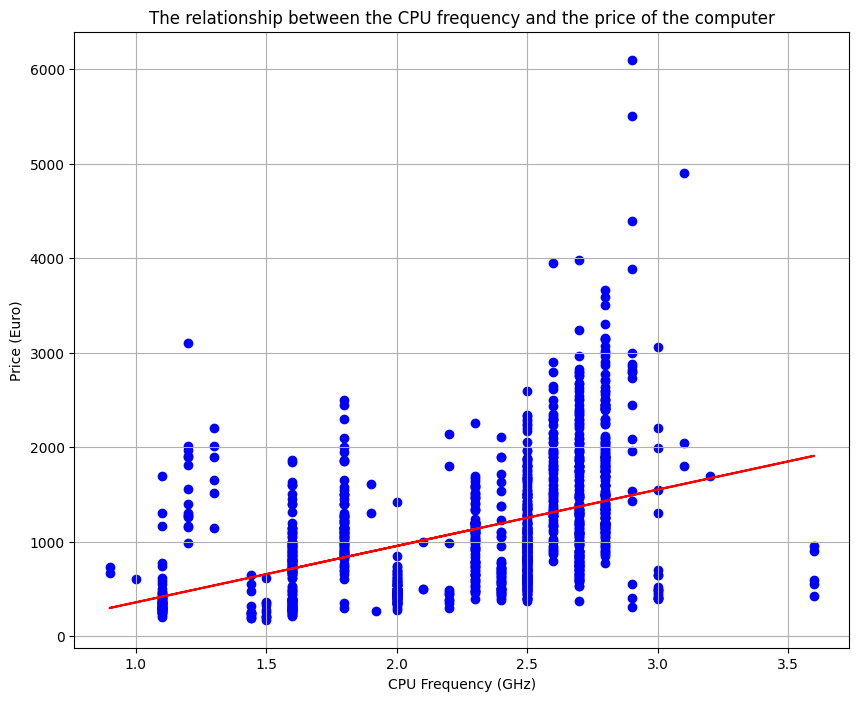

In [12]:
### BONUS:
'''List of questions:
1- what is the relationship between the CPU frequency to the price of the computer?
2- What company has the most faster CPU? according to the CPU frequency.
3- Which company has the widest veriety of lpatops?
4- what is the relashionship between the storage type and it's weight?
5- how the size (inces) affect the price of the comuter?'''

### First question: what is the relationship between the CPU frequency to the price of the computer?
## my hypothesis is that as the computer is faster (higher frequency) it will be more expensive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

plt.figure(figsize = (10,8))
'''
The polyfit() function => work on one veriable regression- use the CPU frequency to predict the Price, for a simple regression the degree is 1
The polyval() function => to plot the regression line. i gave the reg_line and the independent variable - CPU frequency
'''
reg_line = np.polyfit(data['CPU_Frequency (GHz)'], data['Price (Euro)'], deg = 1) #creating a regression line
trend_reg = np.polyval(reg_line, data['CPU_Frequency (GHz)'])

plt.scatter(data['CPU_Frequency (GHz)'], data['Price (Euro)'], color = 'blue', label = 'laptops')
plt.plot(data['CPU_Frequency (GHz)'], trend_reg, color = 'red', label = 'regression line')

plt.title("The relationship between the CPU frequency and the price of the computer")
plt.xlabel("CPU Frequency (GHz)")
plt.ylabel("Price (Euro)")
plt.grid(True)

plt.show()




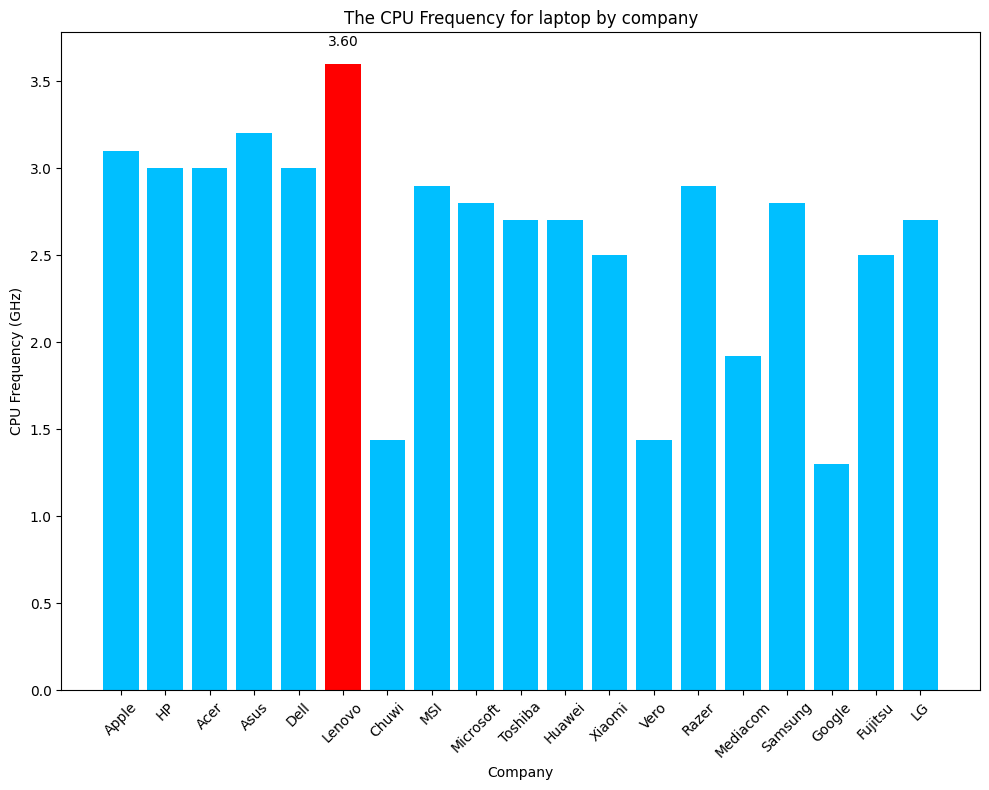

In [13]:
# second question: 
# What company has the most faster CPU? according to the CPU frequency

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import the dataset from my filesystem
data = pd.read_csv(r"C:\Users\Shir Zivav\Documents\PythonVSC\empy_python_package\laptop_price - dataset.csv")

# first, i will find the company that has the highest CPU frequency:
max_frequency = data.loc[data['CPU_Frequency (GHz)'].idxmax()] #find the max value of CPU frequency
company_maxf = max_frequency['Company'] #the company that has the highest frequency
max_cpu_f = max_frequency['CPU_Frequency (GHz)'] # ensure consistent column name

# create a bar graph for the cpu frequancy for all companies
plt.figure(figsize= (10,8))
plt.bar(data['Company'], data['CPU_Frequency (GHz)'], color = 'deepskyblue') #creating a bar graph 
plt.bar(company_maxf, max_cpu_f, color = 'red') #coloring the max value in red

plt.title("The CPU Frequency for laptop by company")
plt.xlabel("Company")
plt.ylabel("CPU Frequency (GHz)")
plt.xticks(rotation = 45)
plt.text(company_maxf,max_cpu_f + 0.1, f'{max_cpu_f:.2f}', ha='center', color = 'black') # marking the max value 0.1 units above the bar
plt.tight_layout()
plt.show()
